In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint 

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [5]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    mse = calc_mse(y, np.dot(X, W))
    r = W.copy()
    r = np.append(r, mse)
    return r

#### Нормализация данных

In [8]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

#### Стандартизация данных

In [9]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [10]:
W = np.random.randn(X.shape[1])
W

array([ 1.10346127, -0.43982248,  0.52537858,  1.32066409])

In [11]:
list_result = []
reg_list = []
d = 1
for l in range(0, 10):
    list_result.append(gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=10/d))
    reg_list.append(10/d)
    d *=10

In [12]:
ar_result = np.asarray(list_result)

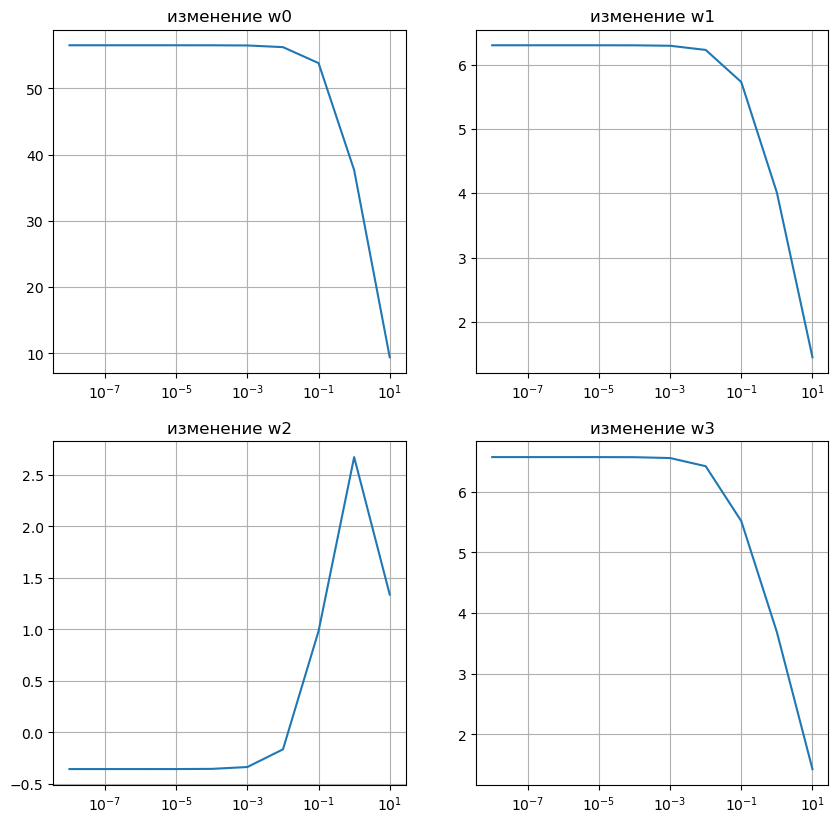

In [13]:
# Создание figure и параметров отрисовки
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), dpi=100)

# График изменения веса w0
ax1.semilogx(reg_list, ar_result[:, 0])
ax1.set(title='изменение w0')
ax1.grid()

# График изменения веса w1
ax2.semilogx(reg_list, ar_result[:, 1])
ax2.set(title='изменение w1')
ax2.grid()

# График изменения веса w2
ax3.semilogx(reg_list, ar_result[:, 2])
ax3.set(title='изменение w2')
ax3.grid()

# График изменения веса w3
ax4.semilogx(reg_list, ar_result[:, 3])
ax4.set(title='изменение w3')
ax4.grid()

plt.show()

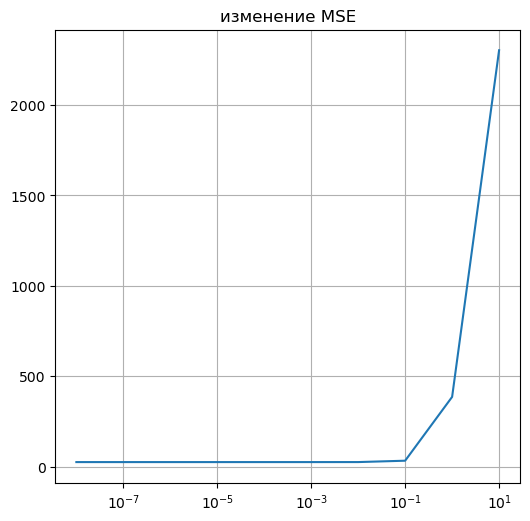

In [14]:
fig, ax1 = plt.subplots(1, figsize=(6, 6), dpi=100)

# График изменения MSE
ax1.semilogx(reg_list, ar_result[:, 4])
ax1.set(title='изменение MSE')
ax1.grid()

plt.show()

#### Задание 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [15]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    mse = calc_mse(y, np.dot(X, W))
    r = W.copy()
    r = np.append(r, mse)
    return r

In [16]:
list_result = []
reg_list = []
d = 1
for l in range(0, 10):
    list_result.append(gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=10/d))
    reg_list.append(10/d)
    d *=10

Iter: 0, weights: [11.12906758  2.71246713  2.09458698  1.71336247], error 3278.862175611351
Iter: 500, weights: [51.5         3.10669619  0.55295749  2.96815945], error 80.26160481859309
Iter: 1000, weights: [51.5         3.04945536  0.66155906  2.91189553], error 80.38005746095392
Iter: 1500, weights: [51.5         2.99950117  0.76111165  2.85868963], error 80.47525284984988
Iter: 2000, weights: [51.5         2.93010503  0.88800039  2.80566894], error 80.40876482426717
Iter: 2500, weights: [51.5         2.87935303  1.01431222  2.76483779], error 79.72540878591309
Iter: 3000, weights: [51.5         2.92109552  1.29983886  2.85176929], error 71.9703284676506
Iter: 3500, weights: [51.5         3.34776802  1.97316869  3.33141578], error 79.7065021950447
Iter: 4000, weights: [5.15000000e+01 3.32697125e+00 3.37867358e-02 3.28923343e+00], error 79.75691696221436
Iter: 4500, weights: [51.5         3.29853414  0.10777911  3.2406521 ], error 79.82155907663031
Final MSE: 79.88223239855877
Iter:

Iter: 3500, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 4000, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 4500, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Final MSE: 24.904618876908444
Iter: 0, weights: [11.28262299  1.03941755  2.80604752  1.47516444], error 3407.1112164981764
Iter: 500, weights: [56.49999999  6.30305974 -0.35622596  6.57134199], error 24.904618881774375
Iter: 1000, weights: [56.49999999  6.30309347 -0.35638878  6.57147638], error 24.904618876908394
Iter: 1500, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.904618876908394
Iter: 2000, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.904618876908373
Iter: 2500, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.904618876908373
Iter: 3000, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.904618876908373
Iter

In [17]:
ar_result = np.asarray(list_result)

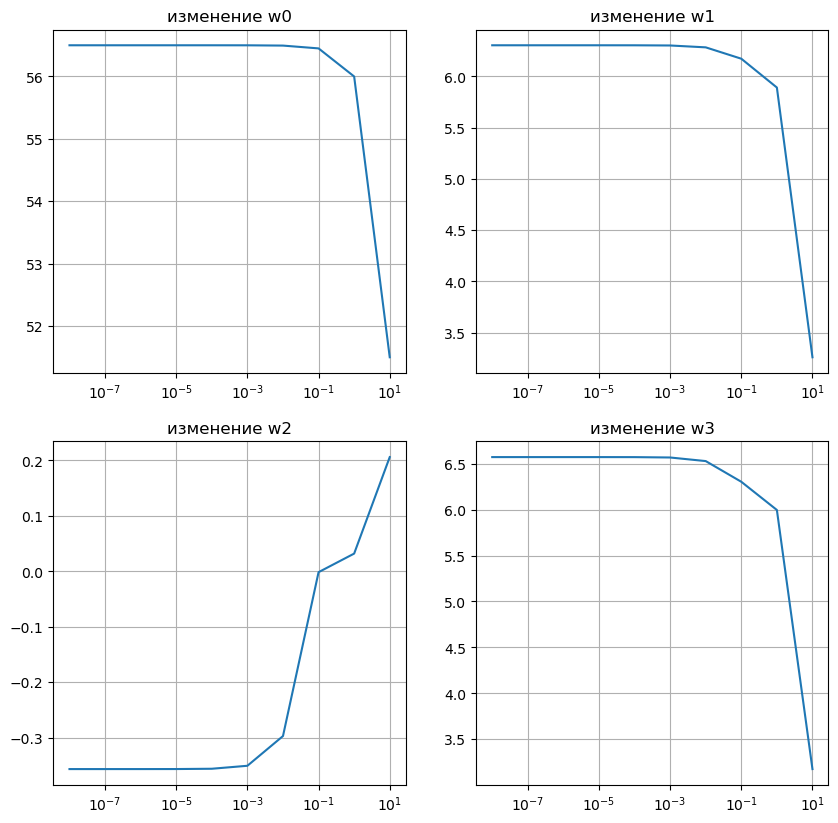

In [18]:
# Создание figure и параметров отрисовки
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), dpi=100)

# График изменения веса w0
ax1.semilogx(reg_list, ar_result[:, 0])
ax1.set(title='изменение w0')
ax1.grid()

# График изменения веса w1
ax2.semilogx(reg_list, ar_result[:, 1])
ax2.set(title='изменение w1')
ax2.grid()

# График изменения веса w2
ax3.semilogx(reg_list, ar_result[:, 2])
ax3.set(title='изменение w2')
ax3.grid()

# График изменения веса w3
ax4.semilogx(reg_list, ar_result[:, 3])
ax4.set(title='изменение w3')
ax4.grid()

plt.show()

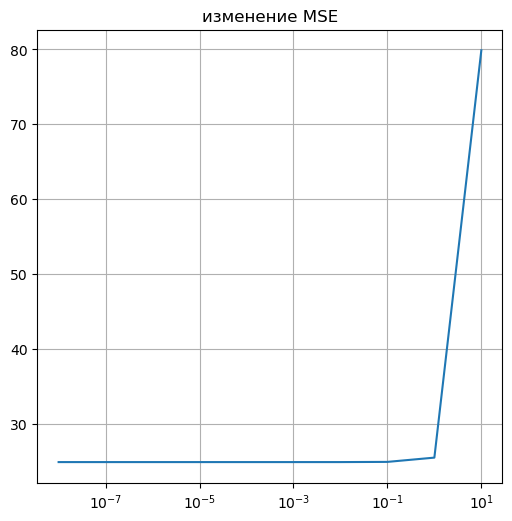

In [19]:
fig, ax1 = plt.subplots(1, figsize=(6, 6), dpi=100)

# График изменения MSE
ax1.semilogx(reg_list, ar_result[:, 4])
ax1.set(title='изменение MSE')
ax1.grid()

plt.show()

### 3. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [20]:
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [21]:
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [22]:
X_n_st = X_norm.copy().astype(np.float64)
X_n_st[:, 1] = standard_scale(X_n_st[:, 1])
X_n_st[:, 2] = standard_scale(X_n_st[:, 2])
X_n_st[:, 3] = standard_scale(X_n_st[:, 3])

X_n_st

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

In [23]:
X_n_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [24]:
X_norm[:, 2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

In [25]:
np.mean(X_n_st[:, 2])

-1.1310397063368783e-16

In [26]:
np.mean(X_norm[:, 2])

0.33870967741935487

In [27]:
np.std(X_norm[:, 2])

0.312836707262799

In [28]:
X_norm[0, 2]

0.03225806451612903

In [29]:
(X_norm[0, 2] - np.mean(X_norm[:, 2])) / np.std(X_norm[:, 2])

-0.9795896894087646

In [30]:
X_norm[1, 2]

0.16129032258064516

In [31]:
(X_norm[1, 2] - np.mean(X_norm[:, 2])) / np.std(X_norm[:, 2])

-0.5671308728156005

In [32]:
X

array([[   1,    1,  500,    1],
       [   1,    1,  700,    1],
       [   1,    2,  750,    2],
       [   1,    5,  600,    1],
       [   1,    3, 1450,    2],
       [   1,    0,  800,    1],
       [   1,    5, 1500,    3],
       [   1,   10, 2000,    3],
       [   1,    1,  450,    1],
       [   1,    2, 1000,    2]])